In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')

df=pd.read_csv("london_crime.csv")

In [12]:
df.head(10)

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
5,E01001320,Ealing,Theft and Handling,Other Theft,0,2012,5
6,E01001342,Ealing,Violence Against the Person,Offensive Weapon,0,2010,7
7,E01002633,Hounslow,Robbery,Personal Property,0,2013,4
8,E01003496,Newham,Criminal Damage,Criminal Damage To Other Building,0,2013,9
9,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [14]:
df.describe(include="object")

,lsoa_code,borough,major_category,minor_category
count,13490604,13490604,13490604,13490604
unique,4835,33,9,32
top,E01003689,Croydon,Theft and Handling,Common Assault
freq,3456,602100,3966300,522180


In [15]:
df.isnull().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

In [16]:
df["major_category"].unique()

array(['Burglary', 'Violence Against the Person', 'Robbery',
       'Theft and Handling', 'Criminal Damage', 'Drugs',
       'Fraud or Forgery', 'Other Notifiable Offences', 'Sexual Offences'],
      dtype=object)

#  Top 10 Boroughs with most Crimes

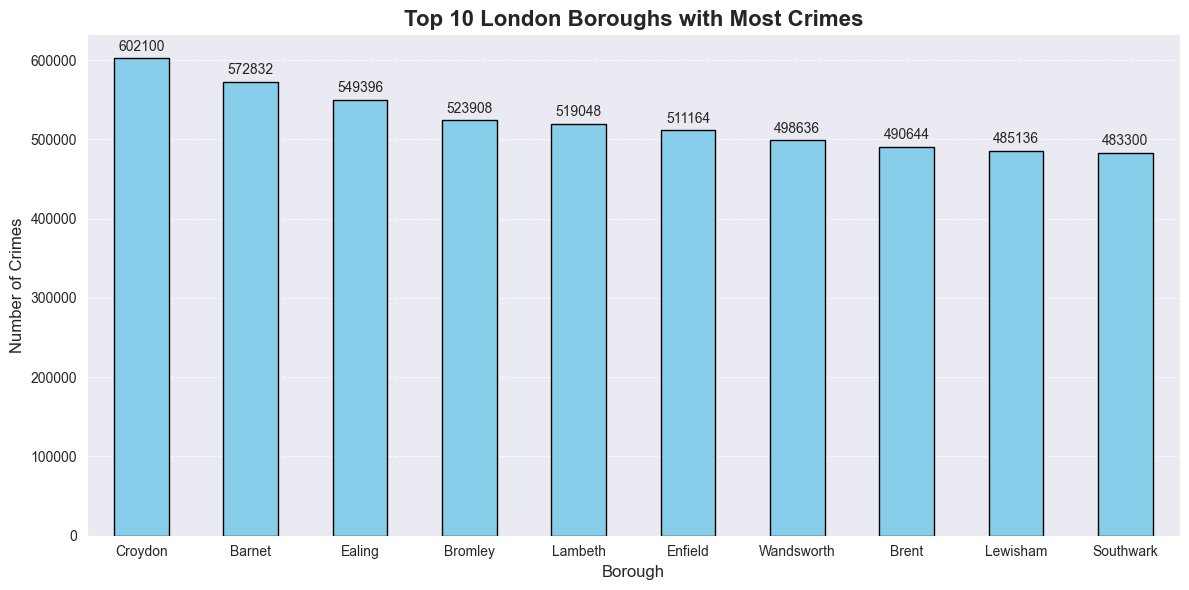

In [87]:
Top_10_borough = df["borough"].value_counts().head(10)
ax = Top_10_borough.plot(
    kind="bar", 
    figsize=(12, 6), 
    color='skyblue', 
    edgecolor='black'
)
plt.title("Top 10 London Boroughs with Most Crimes", fontsize=16, fontweight='bold')
plt.xlabel("Borough", fontsize=12)
plt.ylabel("Number of Crimes", fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars with values
for i, v in enumerate(Top_10_borough.values):
    ax.text(i, v + max(Top_10_borough.values)*0.01, str(v), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

The highest Borough with crimes is croydon

# Top ten safest Boroughs 

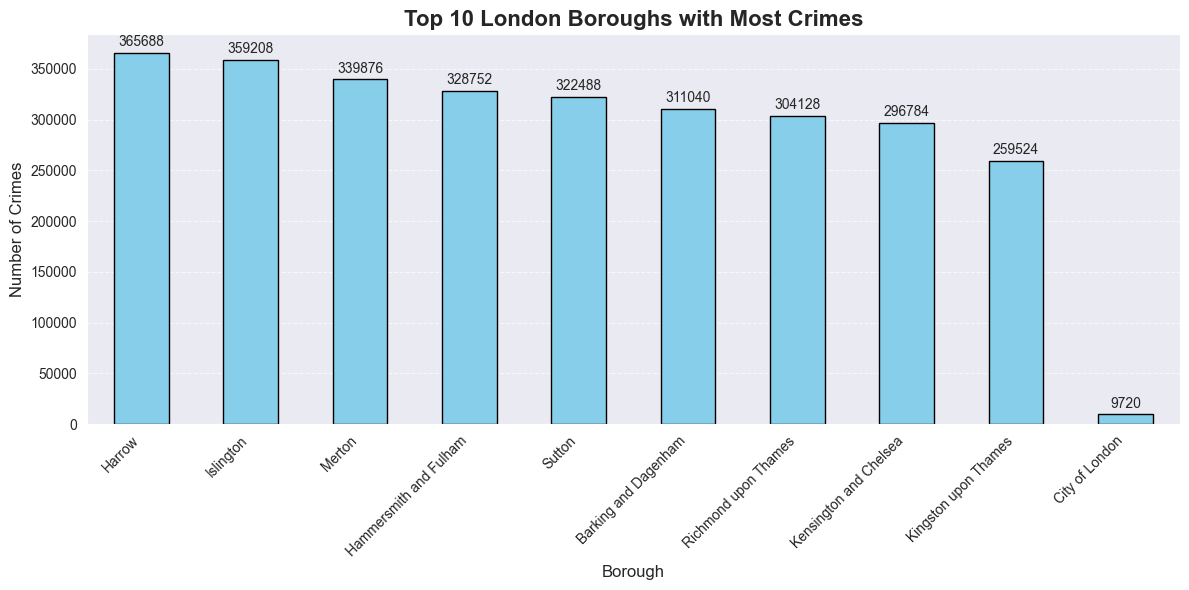

In [88]:
Top_10_borough = df["borough"].value_counts().tail(10)
ax = Top_10_borough.plot(
    kind="bar", 
    figsize=(12, 6), 
    color='skyblue', 
    edgecolor='black'
)
plt.title("Top 10 London Boroughs with Most Crimes", fontsize=16, fontweight='bold')
plt.xlabel("Borough", fontsize=12)
plt.ylabel("Number of Crimes", fontsize=12)
plt.xticks(rotation=45, ha='right')  # <-- Fix overlap
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars with values
for i, v in enumerate(Top_10_borough.values):
    ax.text(i, v + max(Top_10_borough.values)*0.01, str(v), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

The city of London is the safest Boroughs

# Number of Crimes over the year

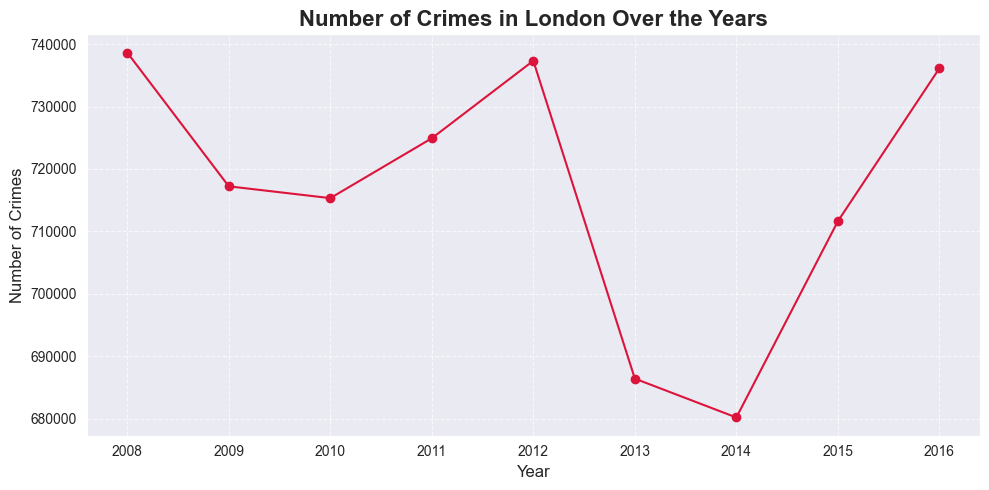

In [ ]:
Number_of_Crimes_over_the_year = df.groupby('year')['value'].sum()
Number_of_Crimes_over_the_year.plot(kind="line", marker='o', color='crimson')

plt.figure(figsize=(10, 5))
plt.title("Number of Crimes in London Over the Years", fontsize=16, fontweight='bold')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Crimes", fontsize=12)
plt.grid(linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

It was the highest in 2008 and the lowest in 2014

# Crimes by seasons

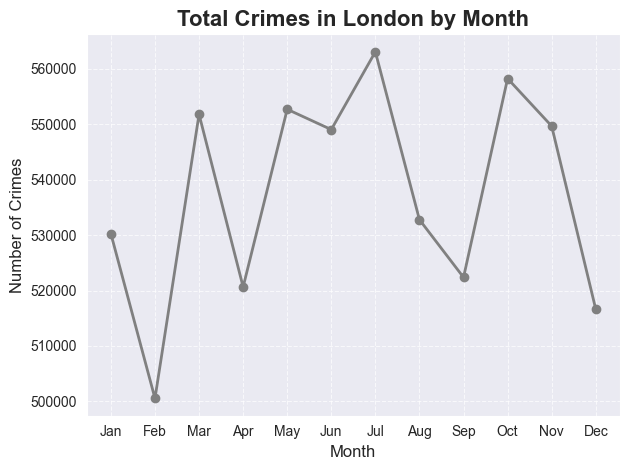

In [67]:
# Group and sum crimes by month
month_crime = df.groupby("month")["value"].sum()

# Ensure all months 1-12 are present and ordered
month_crime = month_crime.reindex(range(1, 13), fill_value=0)

# Month labels for x-axis
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

month_crime.plot(kind='line', color='grey', marker='o', linewidth=2)
plt.title("Total Crimes in London by Month", fontsize=16, fontweight='bold')
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Crimes", fontsize=12)
plt.xticks(ticks=range(1, 13), labels=month_labels, rotation=0)
plt.grid(linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The winter has the lowest crimes while summer has the highest crimes

# Most common crime type in each borough

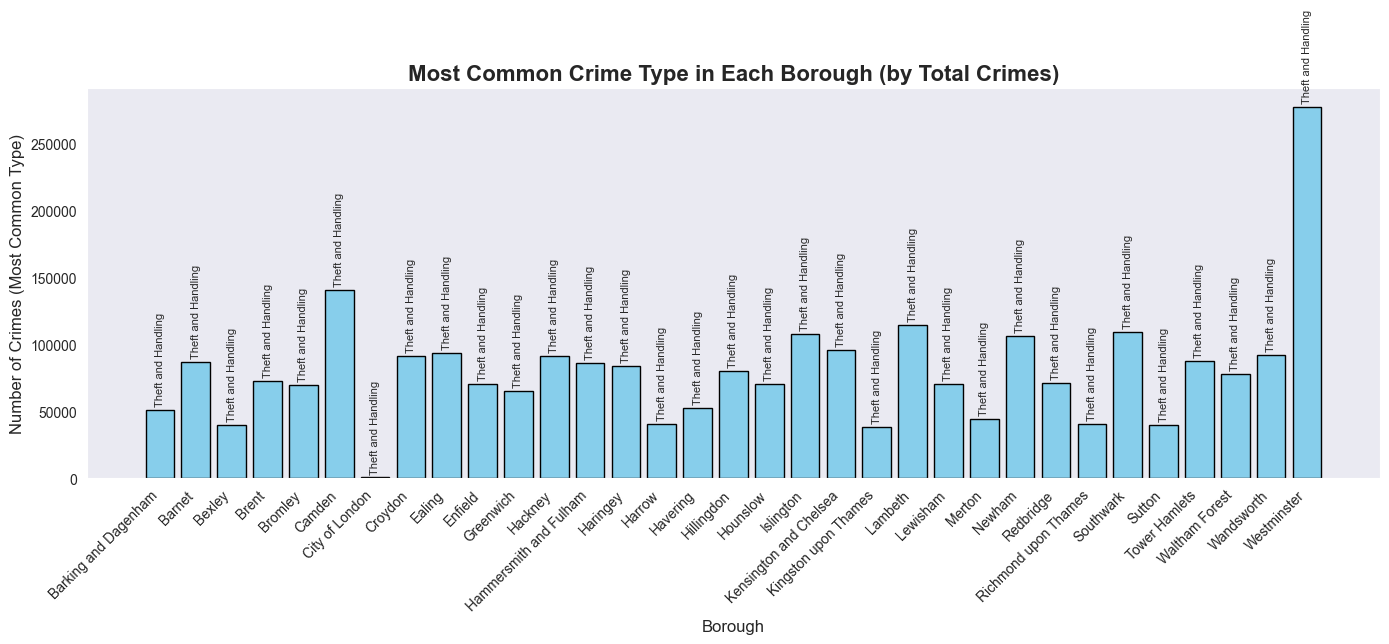

In [82]:
# Get the most common crime type and its count for each borough
most_common = df.groupby(['borough', 'major_category'])['value'].sum().reset_index()
idx = most_common.groupby('borough')['value'].idxmax()
most_common_borough = most_common.loc[idx].set_index('borough')

# Plot
plt.figure(figsize=(14, 6))
bars = plt.bar(most_common_borough.index, most_common_borough['value'], color='skyblue', edgecolor='black')
plt.title("Most Common Crime Type in Each Borough (by Total Crimes)", fontsize=16, fontweight='bold')
plt.xlabel("Borough", fontsize=12)
plt.ylabel("Number of Crimes (Most Common Type)", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Annotate bars with crime type
for i, (borough, row) in enumerate(most_common_borough.iterrows()):
    plt.text(i, row['value'] + max(most_common_borough['value'])*0.01, row['major_category'], 
             ha='center', va='bottom', fontsize=8, rotation=90)

plt.show()

All boroughs have the same type which is Theft and handling